# Analysis of Input parameters of 3D Printer and Predicting Output Parameters

As a mechanical engineer, do we need to work in the area of Machine Learning?" is the question I have come across the most recently. I had been wondering from the last few days that being Machine Learning, Deep Learning enthusiast, and being a mechanical engineer undergraduate, can I combine my knowledge of these fields? I began to do research, and then I found a Turkish article. After some more research, I finally found a dataset. This dataset comes from research by TR/Selcuk University Mechanical Engineering department. This dataset is based on the Ultimaker S5 3-D printer settings and filaments.

The study aims to determine how much of the adjustment parameters in 3d printers affect print quality, accuracy, and strength. There are nine setting parameters and three measured output parameters.

In [1]:
import numpy as np
import pandas as pd

orig_data = pd.read_csv('datasets/data.csv')

Setting Parameters:

1. Layer Height (mm)
2. Wall Thickness (mm)
3. Infill Density (%)
4. Infill Pattern ()
5. Nozzle Temperature (Cº)
6. Bed Temperature (Cº)
7. Print Speed (mm/s)
8. Material ()
9. Fan Speed (%)

Output Parameters: (Measured)

1. Roughness (µm)
2. Tension (ultimate) Strength (MPa)
3. Elongation (%)

Those interested in printers are very familiar with these terms. The first 9 parameters here are printer print settings, so the others don't change when you change any. However, the surface roughness, Tensile strength and Tensile percent elongation vary according to these first nine parameters. So which parameter affects how much. Here we will seek the answer to this question.

In [2]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strength    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.4+ KB


There is no missing values in any column. So, good for us!!

Okay! Now let's check out unique values in each column.

In [3]:
for column in orig_data.columns:
    print(str(column)+": "+str(orig_data[column].unique()))

layer_height: [0.02 0.06 0.1  0.15 0.2 ]
wall_thickness: [ 8  7  1  4  6 10  5  9  2  3]
infill_density: [90 80 70 40 10 20 50 30 60]
infill_pattern: ['grid' 'honeycomb']
nozzle_temperature: [220 225 230 240 250 200 205 210 215]
bed_temperature: [60 65 70 75 80]
print_speed: [ 40  60 120]
material: ['abs' 'pla']
fan_speed: [  0  25  50  75 100]
roughness: [ 25  32  40  68  92  60  55  21  24  30  75 118 200 220 126 145  88  74
 120 144 265 312 368 180 176 128 138 121 168 154 225 289 326 192 212 172
 163 276 298 360 357 321 278 244]
tension_strength: [18 16  8 10  5 24 12 14 27 25 37  9 23 26 33 29 19 11 34 13 22  4 35 28
 21 30]
elongation: [1.2 1.4 0.8 0.5 0.7 1.1 1.3 1.5 1.7 2.4 1.  2.2 1.9 1.6 2.1 2.  0.9 0.4
 1.8 2.9 0.6 2.8 2.3 3.3 3.1 2.7 3.2]


As you can see, there are some categorical and font data here. Now let's convert these String values to numbers.

In [4]:
#Copying Dataframe to another variable
data_cpy=orig_data.copy()

#In this data set, ABS and PLA assigned 0 and 1 values for materials (abs = 0, pla = 1)
data_cpy.material = [0 if each=='abs' else 1 for each in data_cpy.material]

#In this data set, grid and honeycomb assigned 0 and 1 values for infill_pattern (grid = 0, honeycomb = 1)
data_cpy.infill_pattern = [0 if each=='grid' else 1 for each in data_cpy.infill_pattern]

data_cpy.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strength,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


To make it more understandable, Let's multiply the height of the layer and the decimal data, which is elongation, by 100.

In [5]:
data_cpy.layer_height = data_cpy.layer_height*100
data_cpy.elongation = data_cpy.elongation*100

In [6]:
#Seperate Input parameters and Prediction Materials.

y_data = data_cpy.material.values
x_data = data_cpy.drop(['material'],axis=1)

Now let's draw a few plots and try to find out which parameters are affected by the data set.

Let's divide the data set into two as Abs and Pla material.

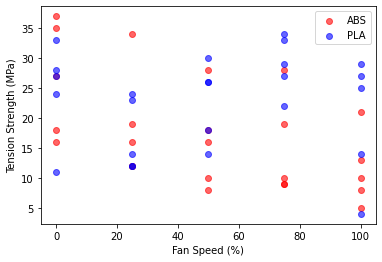

In [7]:
abs_data = data_cpy[data_cpy.material==0]
pla_data = data_cpy[data_cpy.material==1]

#Next, let's examine the effect of fan speed on breaking strength.
import matplotlib.pyplot as plt
plt.scatter(abs_data.fan_speed,abs_data.tension_strength,color="red",label="ABS",alpha= 0.6)
plt.scatter(pla_data.fan_speed,pla_data.tension_strength,color="blue",label="PLA",alpha=0.6)
plt.xlabel("Fan Speed (%)")
plt.ylabel("Tension Strength (MPa)")
plt.legend()
plt.show()

As it is clearly seen from the distribution, the Nozzle fan provides a good layer adhesion for PLA while it has a negative effect for ABS. Hence, air circulation not good for ABS

But, do we have to plot every feature with respect to each other feature.
Let's see that can we take the help of correlation matrix!!

In [8]:
corr = data_cpy.corr()
corr.style.background_gradient(cmap='Accent').set_precision(2)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strength,elongation
layer_height,1.00,-0.19,0.00,0.00,-0.00,0.00,-0.06,-0.00,0.00,0.80,0.34,0.51
wall_thickness,-0.19,1.00,0.10,0.15,-0.12,-0.03,-0.42,0.12,-0.03,-0.23,0.40,0.18
infill_density,0.00,0.10,1.00,-0.17,0.24,0.00,-0.09,-0.26,0.00,0.12,0.36,0.16
infill_pattern,0.00,0.15,-0.17,1.00,-0.17,0.00,0.00,0.20,0.00,-0.07,0.01,0.05
nozzle_temperature,-0.00,-0.12,0.24,-0.17,1.00,0.60,0.00,-0.78,0.60,0.35,-0.41,-0.53
bed_temperature,0.00,-0.03,0.00,0.00,0.60,1.00,0.00,0.00,1.00,0.19,-0.25,-0.30
print_speed,-0.06,-0.42,-0.09,0.00,0.00,0.00,1.00,0.00,0.00,0.12,-0.26,-0.23
material,-0.00,0.12,-0.26,0.20,-0.78,0.00,0.00,1.00,0.00,-0.23,0.29,0.39
fan_speed,0.00,-0.03,0.00,0.00,0.60,1.00,0.00,0.00,1.00,0.19,-0.25,-0.30
roughness,0.80,-0.23,0.12,-0.07,0.35,0.19,0.12,-0.23,0.19,1.00,0.05,0.10


From above data, I am going to plot these following graphs:
1. layer_height and roughness
2. wall-thickness and tension_strength
3. infill_density and tension_strength
4. nozzle_temperature and roughness
5. bed_temperature and roughness
6. print_speed and roughness
7. fan_speed and roughness (already done!)

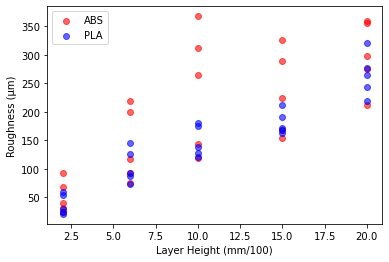

In [9]:
plt.scatter(abs_data.layer_height,abs_data.roughness,color="red",label="ABS",alpha= 0.6)
plt.scatter(pla_data.layer_height,pla_data.roughness,color="blue",label="PLA",alpha=0.6)
plt.xlabel("Layer Height (mm/100)")
plt.ylabel("Roughness (µm)")
plt.legend()
plt.show()

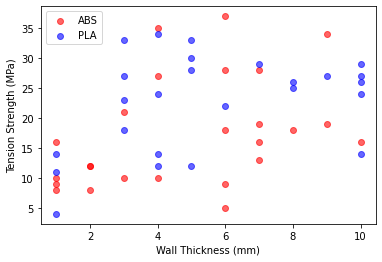

In [10]:
plt.scatter(abs_data.wall_thickness,abs_data.tension_strength,color="red",label="ABS",alpha= 0.6)
plt.scatter(pla_data.wall_thickness,pla_data.tension_strength,color="blue",label="PLA",alpha=0.6)
plt.xlabel("Wall Thickness (mm)")
plt.ylabel("Tension Strength (MPa)")
plt.legend()
plt.show()

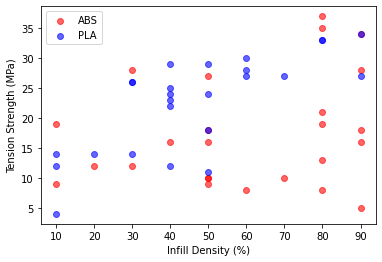

In [11]:
plt.scatter(abs_data.infill_density,abs_data.tension_strength,color="red",label="ABS",alpha= 0.6)
plt.scatter(pla_data.infill_density,pla_data.tension_strength,color="blue",label="PLA",alpha=0.6)
plt.xlabel("Infill Density (%)")
plt.ylabel("Tension Strength (MPa)")
plt.legend()
plt.show()

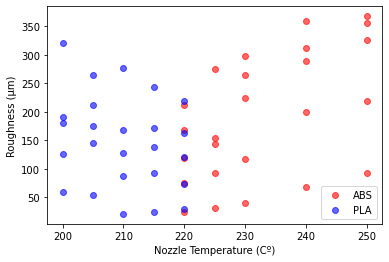

In [12]:
plt.scatter(abs_data.nozzle_temperature,abs_data.roughness,color="red",label="ABS",alpha= 0.6)
plt.scatter(pla_data.nozzle_temperature,pla_data.roughness,color="blue",label="PLA",alpha=0.6)
plt.xlabel("Nozzle Temperature (Cº)")
plt.ylabel("Roughness (µm)")
plt.legend()
plt.show()

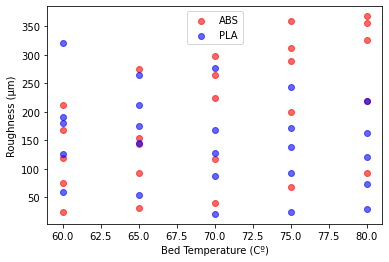

In [13]:
plt.scatter(abs_data.bed_temperature,abs_data.roughness,color="red",label="ABS",alpha= 0.6)
plt.scatter(pla_data.bed_temperature,pla_data.roughness,color="blue",label="PLA",alpha=0.6)
plt.xlabel("Bed Temperature (Cº)")
plt.ylabel("Roughness (µm)")
plt.legend()
plt.show()

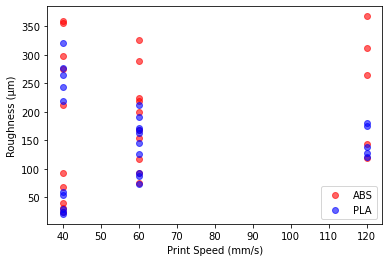

In [14]:
plt.scatter(abs_data.print_speed,abs_data.roughness,color="red",label="ABS",alpha= 0.6)
plt.scatter(pla_data.print_speed,pla_data.roughness,color="blue",label="PLA",alpha=0.6)
plt.xlabel("Print Speed (mm/s)")
plt.ylabel("Roughness (µm)")
plt.legend()
plt.show()

From the above 5 plots, following conclusions can be made:
1. As the layer height increases, the tensile strength increases. But as you can see clearly here PLA smoother than ABS
2. Though it's hard to say, but for PLA it can said that Tensile strength increase as wall thickness increases
3. It's clear that for PLA, tensile strength increases as the infill density increases.
4. From this plot, we get the idea that for PLA working nozzle temperature range is 200-220 and for ABS is 220-250. One interesting thing to note that, for PLA: final output material gets smoother as temperature increases while for ABS it's opposite.
5. At 40mm/s speed, for both PLA and ABS, there are two types of final output, one being smoother than other. Also as the speed increases roughness decreases but again PLA being smoother than ABS.

Check out this article to confirm our analysis: 
https://my3dmatter.com/influence-infill-layer-height-pattern/

*LET'S GET TO MACHINE LEARNING!*

Let's examine our dataset. Here we need to normalize our data set. An important point: We will compress our data between 0 and 1 since the variables in our data set cannot fall within certain limit values.

In [34]:
#Normalize
x_norm = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm,y_data,test_size = 0.3,random_state=1)

In [40]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(x_train,y_train)

pred = model.predict(x_test)

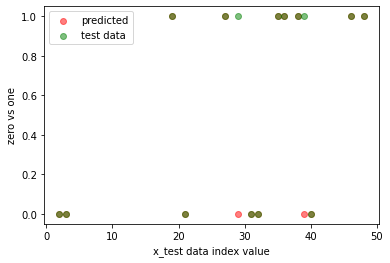

In [41]:
plt.scatter(x_test.index.values,pred,color="red",label="predicted",alpha= 0.5)
plt.scatter(x_test.index.values,y_test,color="green",label="test data",alpha=0.5)
plt.xlabel("x_test data index value")
plt.ylabel("zero vs one")
plt.legend()
plt.show()

In [53]:
#Measure Accuracy
model.score(x_test,y_test)

0.8666666666666667

So, after applying different classifier algorithms, We observed that all classifiers are giving the same accuracy. Though if we distribute our data into the train/test set in the 80-20 ratio, we are getting 100% accuracy, which is not possible. This may be happening because we are very low on data. 

*Note: The data set that I used in my writing was created according to test, experience, research, and some acceptance. Its primary purpose is that enthusiasts and designers grasp Deep Learning on a subject they know. Results may vary depending on printer brand, environmental conditions, printer interface, material, and even environmental conditions.*